## **VISÃO COMPUTACIONAL - AULA 01**

**Objetivos da aula:**

*   apreender os diversos métodos de obtenção de imagens/vídeos em OpenCV
*   aprender a gravar imagens
*   acessar propriedades de imagens
*   acessar pixels individuais de imagens e modificá-los
*   configurar regiões de interesse (ROI) para processamento
*   decompor e fazer junção de canais de imagens











#### **LEITURA DE UMA IMAGEM**

Saving lena.jpg to lena.jpg


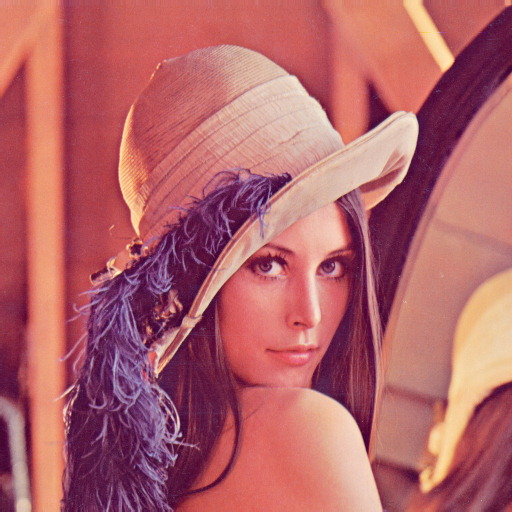

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import sys
from google.colab import files
uploaded=files.upload()

img = cv.imread("lena.jpg")
if img is None:
    sys.exit("Could not read the image.")
cv2_imshow(img)

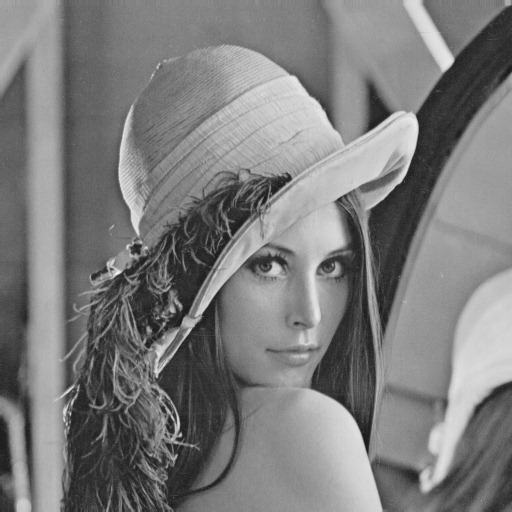

In [6]:
# Image transformation from BGR Color Space to Grayscale Space
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

In [7]:
cv.imwrite("lena_gray.png", gray_img)

True

### **LEITURA DE VÍDEO**

In [8]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import sys

cap = cv.VideoCapture('video.avi')
# Show the first 5 video frames
for i in range(6):
# Se quiser mostrar todos os frames do vídeo, basta usar o loop comentado  
# while cap.isOpened():
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    cv2_imshow(frame)
cap.release()

Can't receive frame (stream end?). Exiting ...


### **LEITURA DE IMAGENS A PARTIR DE UMA CÂMERA**

In [9]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


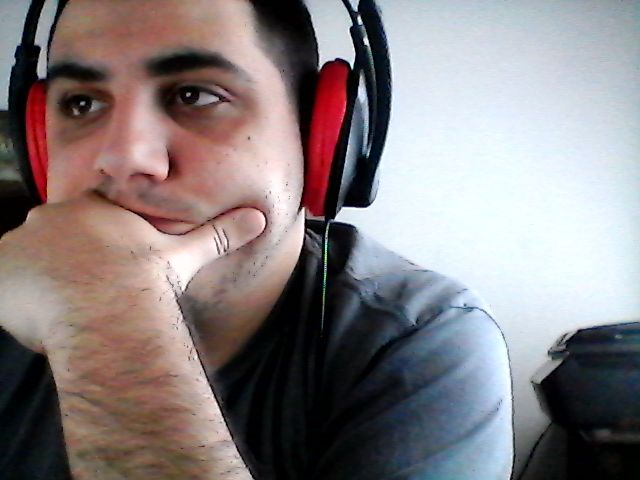

In [10]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## **============ EXERCÍCIO ===================**

Capturar os 10 primeiros frames da sua câmera, convertê-los para níveis de cinza e salvar dez arquivos separados: eu#0.jpg, eu#1.jpg, ..., eu#9.jpg.


<IPython.core.display.Javascript object>

Saved to eu#0.jpg


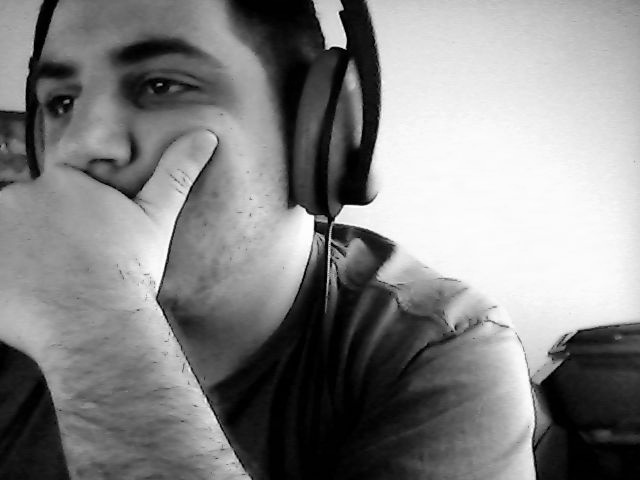

<IPython.core.display.Javascript object>

Saved to eu#1.jpg


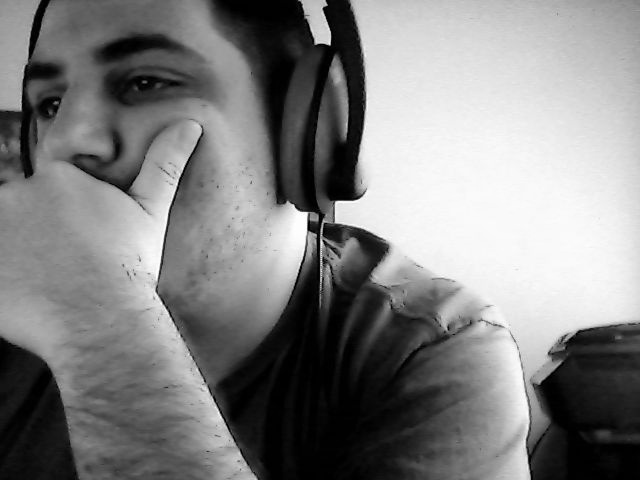

<IPython.core.display.Javascript object>

Saved to eu#2.jpg


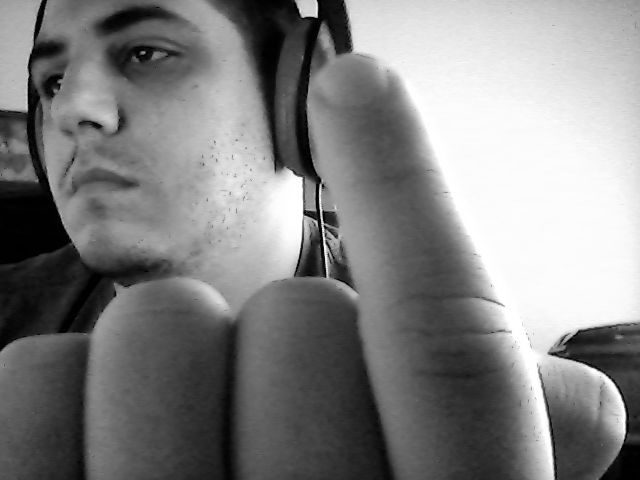

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

In [12]:
#sua solução

from IPython.display import Image

for i in range(10):
  try:
    filename = take_photo(filename="eu#"+str(i)+".jpg")
    img = cv.imread(filename)
    cv.imwrite(filename, cv.cvtColor(img, cv.COLOR_BGR2GRAY))
    print('Saved to {}'.format(filename))
    
    # Show the image which was just taken.
    display(Image(filename))
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

### **PROPRIEDADES DE IMAGENS**

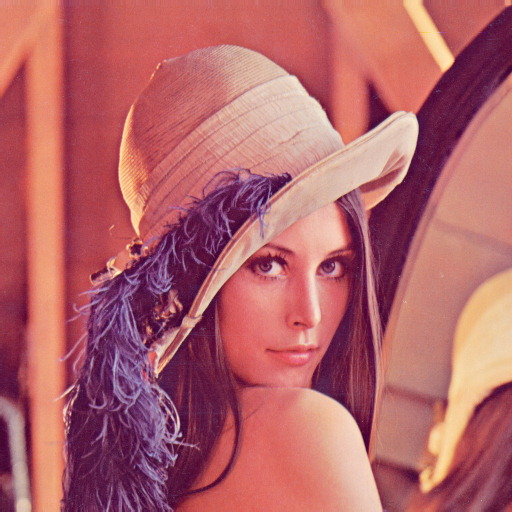

(512, 512, 3)


In [30]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import sys

img = cv.imread("lena.jpg")
if img is None:
    sys.exit("Could not read the image.")
cv2_imshow(img)

#It returns a tuple of the number of rows, columns, and channels (if the image is color)
print( img.shape )

Para acessar o número total de pixels da imagem:

In [31]:
print( img.size,"pixels" )

786432 pixels


Pra exibir o tipo de dado usado na representação de cor de cada pixel:



In [32]:
print( img.dtype )

uint8


### **ACESSO AOS PIXELS DA IMAGEM**

Para acessar as informações (cor) de um pixel, usamos uma linha e uma coluna (o canto superior esquerdo é a origem da imagem [0,0]). Se a imagem for colorida (3 canais), o resultado mostra o valor dos canais B,G e R (nesta ordem).

In [33]:
px = img[100,100]
print( px )

[ 87  74 182]


Para alterar o valor de um pixel, basta indicar sua coordenada (linha,coluna) e atribuir os valores dos canais de cor:

In [34]:
img[100,100] = [255,255,255]
print( img[100,100] )

[255 255 255]


## **============ EXERCÍCIO ===================**

A imagem abaixo está convertida para o espaço de cor de níveis de cinza (cor variando de 0 a 255). Converta esta imagem para preto-e-branco (imagem binária) usando as operações de manipulação de pixel. Se os canais não aparecem, fazemos a suposição que temos apenas um canal de cor.

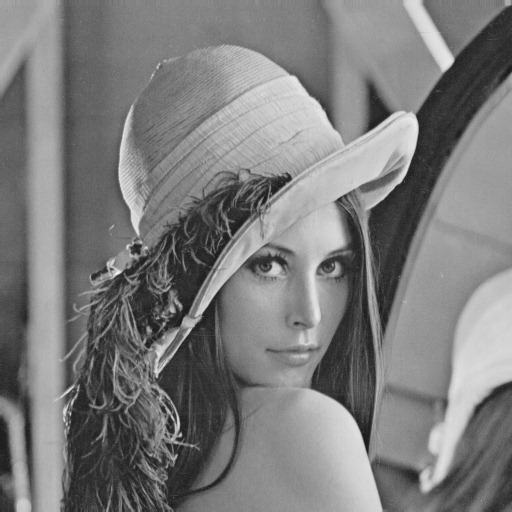

(512, 512)


In [35]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import sys

img = cv.imread("lena.jpg")
if img is None:
    sys.exit("Could not read the image.")
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

print( gray_img.shape )

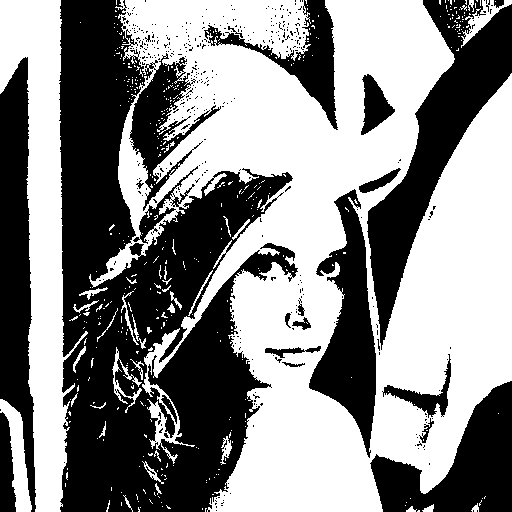

In [37]:
#sua solução
import numpy as np
med = np.mean(gray_img)
for i in range(gray_img.shape[0]):
  for j in range(gray_img.shape[1]):
    if(gray_img[i][j] > med):
      gray_img[i][j] = 255
    else:
      gray_img[i][j] = 0

cv2_imshow(gray_img)

### **REGION OF INTEREST (ROI)**

Em muitos algoritmos de Processamento Digital de Imagens, estamos interssados em somente trabalhar com uma determinada região da imagem, que é chamado região de interesse (ROI). Para definir uma região de interesse, definimos um slice na matriz que representa internamente a imagem.

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import sys

img = cv.imread("lena.jpg")
if img is None:
    sys.exit("Could not read the image.")
cv2_imshow(img)
roi=img[100:250,50:150]
cv2_imshow(roi)


## **============ EXERCÍCIO ===================**

Definir duas ROIs na imagem anterior, para segmentar os dois olhos da Lena.

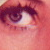

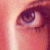

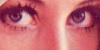

In [46]:
#sua solução
import cv2 as cv
from google.colab.patches import cv2_imshow
import sys

img = cv.imread("lena.jpg")
if img is None:
    sys.exit("Could not read the image.")
roi1 = img[250:300,250:300]
cv2_imshow(roi1)

roi2 = img[250:300,300:350]
cv2_imshow(roi2)

roi3 = img[250:300,250:350]
cv2_imshow(roi3)

Definir uma ROI qualquer na imagem acima e **copiá-la** para um outro lugar na imagem. 

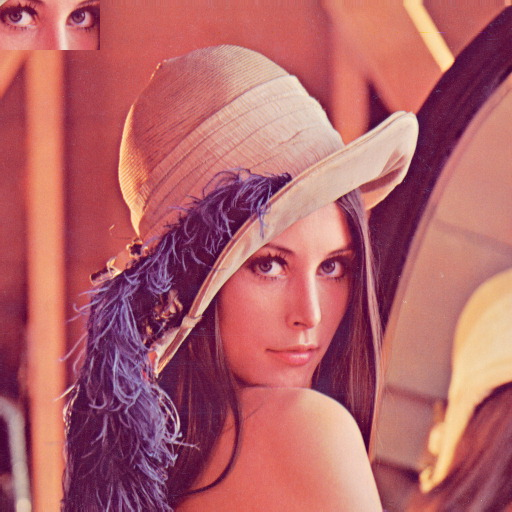

In [47]:
#sua solução
img_copy = img.copy()

img_copy[0:50,0:100] = roi3
cv2_imshow(img_copy)

### **DECOMPOSIÇÃO E JUNÇÃO DE CANAIS DE COR**

Em muitas situações em Visão Computacional, especialmente para imagens em cores (RGB), podemos querer aplicar procedimentos separados nos canais. A separação (split) e junção (merge) de canais é feita como abaixo.

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import sys

img = cv.imread("lena.jpg")
if img is None:
    sys.exit("Could not read the image.")
cv2_imshow(img)
b,g,r = cv.split(img)
cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)

img = cv.merge((b,g,r))

cv2_imshow(img)

### **============ EXERCÍCIO ===================**

A imagem abaixo é uma imagem em níveis de cinza. Construa um programa em OpenCV para colorizar artificialmente esta imagem, gerando uma imagem com três canais de cor B,G e R.

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import sys

img = cv.imread("lena.jpg")
if img is None:
    sys.exit("Could not read the image.")
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

#sua solução